#### This notebook deals with the final version of the combination of Fisher forecasts on $f(R)$ and nDGP from cluster abundances and galaxy clustering. Any erroneous runs should be deleted. If there is anything that needs to be saved, it should be moved to the `Alchemy MG for the paper` notebook.

In [1]:
#Import functions and modules
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.ticker import NullLocator
from matplotlib.ticker import NullFormatter
%matplotlib inline
from matplotlib import rc
plt.rcParams['font.family'] = 'DejaVu Sans'
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
plt.rcParams.update({'font.size': 19}) #It turns out that the setting of fontsize is only effective inside the 
                                       #IPython notebook instead of in a .py file...Mysterious
import os
import copy
#import seaborn as sns
from orphics.stats import corner_plot, FisherMatrix

import Fisher_MG_final
import AgrowthfR_re
HS = AgrowthfR_re.HuSawicki()
DGP = AgrowthfR_re.DGP()
LCDM = AgrowthfR_re.LCDM()
Cm = AgrowthfR_re.Cosmosground()  #Cosmosground() is the parent class of all MG models, 
                                  #storing the universal cosmology parameters and auxilary functions such as σ8
color_for_ellipses6 = [(0.65490196, 0, 0), '#506AC1',(0.18039216, 0.65098039, 0.6627451), (0.9372549 , 0.70588235, 0.23921569), (0.43529412, 0.36470588, 0.27843137)]
rootpath = '/Users/RayneLiu/Desktop/Research/Cosmology/Results_Reports/Plots_for_paper/Fisher_Forecasts'

### $f_{R0} = 10^{-5}$

/Users/RayneLiu/.local/lib/python3.6/site-packages/orphics/stats.py:245: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


Saved plot to /Users/RayneLiu/Desktop/Research/Cosmology/Results_Reports/Plots_for_paper/Fisher_Forecasts/F5LRG+ELG_Full.pdf


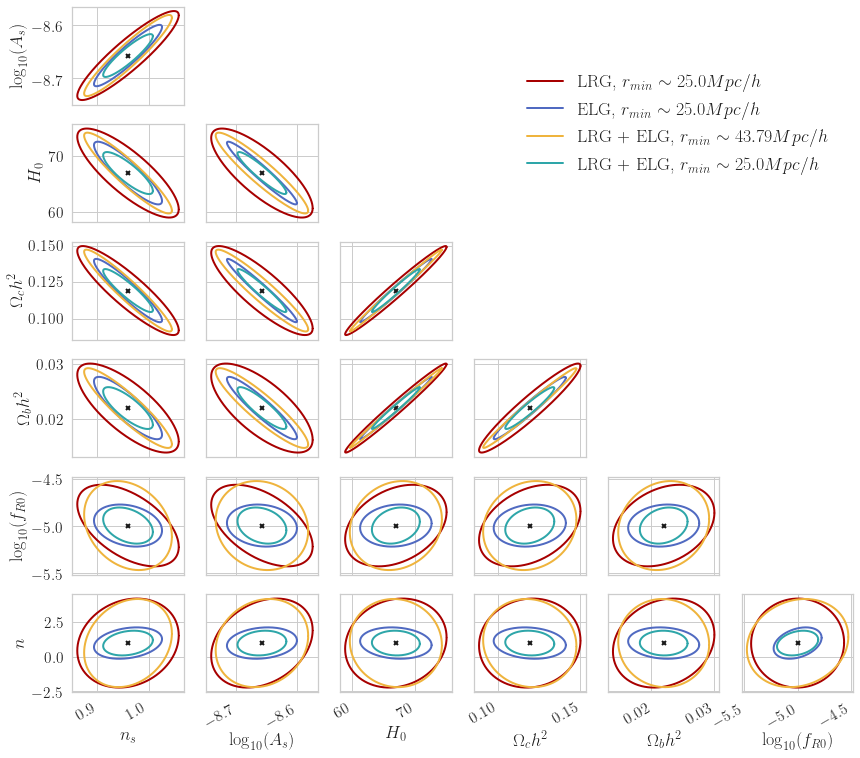

In [16]:
#Galaxy clustering alone
color_for_ellipses5 = [(0.65490196, 0, 0), '#506AC1',(0.9372549 , 0.70588235, 0.23921569), (0.18039216, 0.65098039, 0.6627451), (0.43529412, 0.36470588, 0.27843137)]


#Load the Fisher matrices
LRGF5_matt_Xi024 = np.loadtxt('FisherLRGF5_matt_xi024.txt')
ELGF5_matt_Xi024 = np.loadtxt('FisherELGF5_matt_xi024.txt')
LRGnELGF5_matt_Xi024 = LRGF5_matt_Xi024 + ELGF5_matt_Xi024
LRGnELGF5r45_matt_Xi024 = np.loadtxt('FisherF5total_matt_r45.txt')

#Define the Fisher matrix
#The sequence of parameters see Georgios' email on May 28:
#[n_s, log_{10}(A_s), H_0, \Omega_c h^2, \Omega_b h^2, b_1, \sigma_{RSD}', \log_{10}(f_{R_0}), n]
lrgF5_matt_xi024 = FisherMatrix(
        LRGF5_matt_Xi024,
        ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         r'\text{log}_{10}(f_{R0})', 'n']
    )
elgF5_matt_xi024 = FisherMatrix(
        ELGF5_matt_Xi024,
        ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         r'\text{log}_{10}(f_{R0})', 'n']
    )
lrgelgF5r45_matt_xi024 = FisherMatrix(
        LRGnELGF5r45_matt_Xi024,
        ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         r'\text{log}_{10}(f_{R0})', 'n']
    )
fisherF5_matt = [lrgF5_matt_xi024,
                 elgF5_matt_xi024,
                 lrgelgF5r45_matt_xi024,
                 lrgF5_matt_xi024 + elgF5_matt_xi024,
                 
]

#Start plotting
plotlabels = [r'LRG, $r_{min}\sim 25.0 Mpc/h$', \
              r'ELG, $r_{min}\sim 25.0 Mpc/h$', \
              r'LRG + ELG, $r_{min}\sim 43.79 Mpc/h$',\
              r'LRG + ELG, $r_{min}\sim 25.0 Mpc/h$',\
              ]
paramsfish = ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', r'\text{log}_{10}(f_{R0})', 'n']
corner_plot(fisherF5_matt, plotlabels, \
            fid_dict = {'n_s':0.96, r'\text{log}_{10}(A_s)': np.log10(2.2e-9), 'H_0':67.0, '\Omega_c h^2':0.1194, \
                        '\Omega_b h^2':0.022, r'\text{log}_{10}(f_{R0})': -5.0, 'n': 1.0}, \
            colors = color_for_ellipses5, params = paramsfish, lw=2, labelsize=18, rotate_xlabels = True, gridline = True, loc='upper right')#, save_file=rootpath+'/F5LRG+ELG_Full.pdf')

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


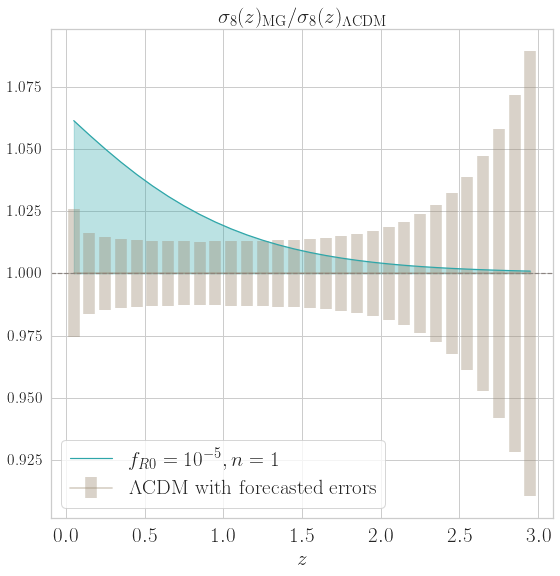

Testing partial derivative over log10(f_R0)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over log10(f_R0) converges nicely, proceeding to partial derivative over n
Testing partia

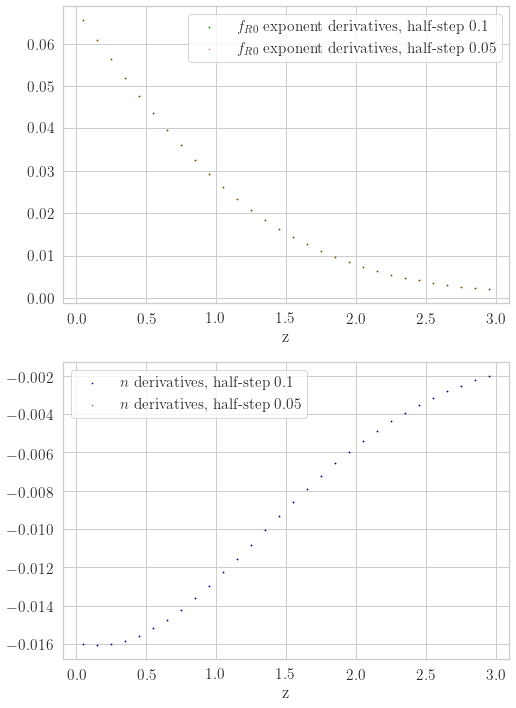

We are now looking at the redshifts:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]
The chosen derivative matrix is:
[[ 0.06556222 -0.01602545]
 [ 0.0608951  -0.01607094]
 [ 0.0563321  -0.01600652]
 [ 0.05190606 -0.0158344 ]
 [ 0.04764214 -0.01555975]
 [ 0.04355954 -0.01518998]
 [ 0.03967287 -0.0147342 ]
 [ 0.03599305 -0.01420276]
 [ 0.03252793 -0.01360686]
 [ 0.02928268 -0.01295824]
 [ 0.02625999 -0.01226884]
 [ 0.0234602  -0.01155056]
 [ 0.02088142 -0.01081493]
 [ 0.01851961 -0.01007287]
 [ 0.01636871 -0.00933449]
 [ 0.01442086 -0.00860884]
 [ 0.01266657 -0.00790378]
 [ 0.01109505 -0.0072259 ]
 [ 0.00969448 -0.00658045]
 [ 0.00845234 -0.00597136]
 [ 0.00735571 -0.00540127]
 [ 0.0063916  -0.0048717 ]
 [ 0.00554723 -0.00438311]
 [ 0.00481021 -0.0039351 ]
 [ 0.00416879 -0.00352655]
 [ 0.00361197 -0.0031558 ]
 [ 0.00312957 -0.00282076]
 [ 0.00271233 -0.00251912]
 [ 0.00235189 -0.002

0

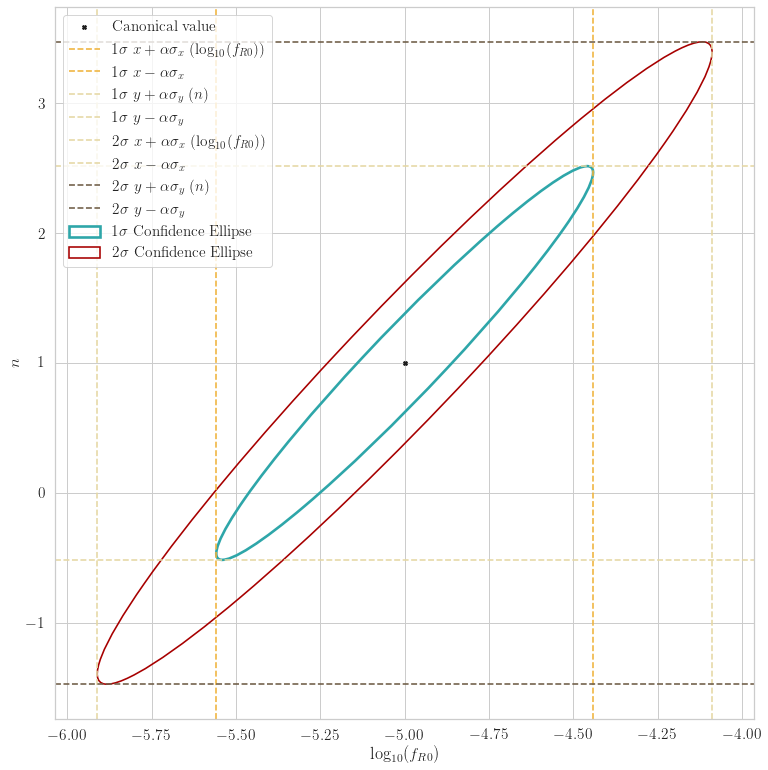

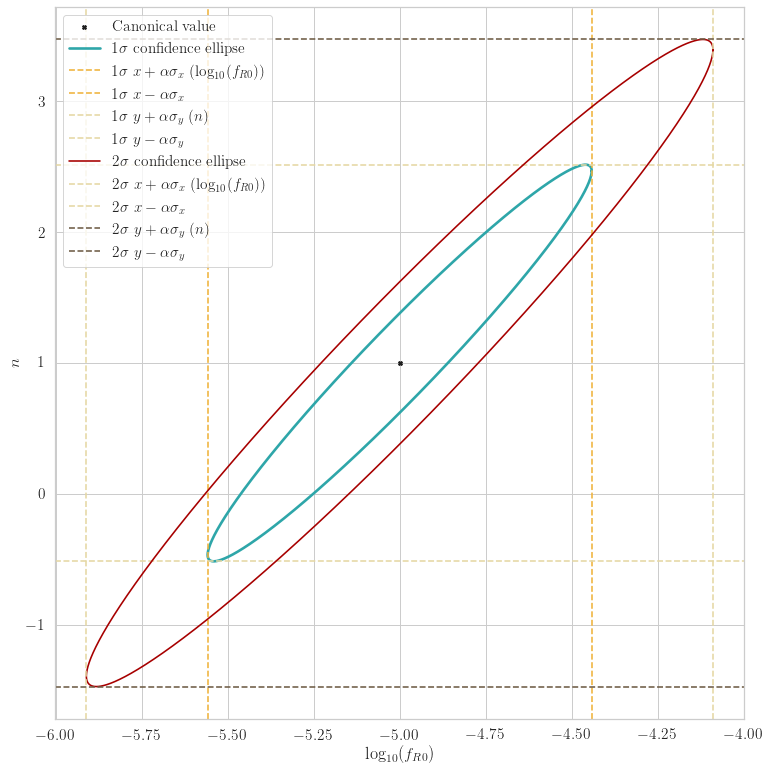

In [3]:
#Cluster abundances alone

z = np.linspace(0.05, 2.95, 30)
k = Cm._p(z)[0] #Sneakyly called the hidden methods. 
                #Won't make that public though, essentially it is np.logspace(-4, 1, 513)
var = (z, k)
labels = r'$f_{R0} = 10^{-5}, n=1$'
pars = [-5, 1]
HS.set_axeslabels([r'$\text{log}_{10}(f_{R0})$', r'$n$'])
HS.set_printables(['log10(f_R0)', 'n'])
Fish5, Margn5, Block5 = Fisher_MG_final.modelanalysis(HS, var, pars = pars, labels = labels, save = False)

os.system('afplay /System/Library/Sounds/Submarine.aiff')

In [4]:
print(Fish5)
print(Margn5)
print(Block5)

[[117.67173665 -41.94970047]
 [-41.94970047  15.9597279 ]]
[0.367405868011522, 0.9976298347085287]
[0.09218578 0.25031522]


In [5]:
#Combination of results and presentation of errors


#From galaxy clustering
CovF5_LRG = np.linalg.inv(LRGF5_matt_Xi024)
F5_LRGfr = np.sqrt(CovF5_LRG[-2][-2])
F5_LRGn = np.sqrt(CovF5_LRG[-1][-1])
print('Error of log10(f_R0) from LRG:')
print(F5_LRGfr)
print('Error of n from LRG:')
print(F5_LRGn)

CovF5_ELG = np.linalg.inv(ELGF5_matt_Xi024)
F5_ELGfr = np.sqrt(CovF5_ELG[-2][-2])
F5_ELGn = np.sqrt(CovF5_ELG[-1][-1])
print('Error of log10(f_R0) from ELG:')
print(F5_ELGfr)
print('Error of n from ELG:')
print(F5_ELGn)

CovF5_gal = np.linalg.inv(LRGnELGF5_matt_Xi024)
F5_galfr = np.sqrt(CovF5_gal[-2][-2])
F5_galn = np.sqrt(CovF5_gal[-1][-1])
print('Error of log10(f_R0) from galaxy clustering:')
print(F5_galfr)
print('Error of n from galaxy clustering:')
print(F5_galn)


#From cluster abundances
print('Error of log10(f_R0) from cluster abundances:')
print(Margn5[0])
print('Error of n from cluster abundances:')
print(Margn5[1])


#Combined
FishF5_n_margin = copy.deepcopy(LRGnELGF5_matt_Xi024)
FishF5_n_margin[-1][-1] = copy.deepcopy(LRGnELGF5_matt_Xi024[-1][-1]) + copy.deepcopy(Fish5[-1][-1])
FishF5_n_margin[-1][-2] = copy.deepcopy(LRGnELGF5_matt_Xi024[-1][-2]) + copy.deepcopy(Fish5[-1][-2])
FishF5_n_margin[-2][-1] = copy.deepcopy(LRGnELGF5_matt_Xi024[-2][-1]) + copy.deepcopy(Fish5[-2][-1])
FishF5_n_margin[-2][-2] = copy.deepcopy(LRGnELGF5_matt_Xi024[-2][-2]) + copy.deepcopy(Fish5[-2][-2])

CovF5_n_margin = np.linalg.inv(FishF5_n_margin)
F5_n_marginfr = np.sqrt(CovF5_n_margin[-2][-2])
F5_n_marginn = np.sqrt(CovF5_n_margin[-1][-1])
print('Error of log10(f_R0) combined:')
print(F5_n_marginfr)
print('Error of n combined:')
print(F5_n_marginn)

Error of log10(f_R0) from LRG:
0.286536349812824
Error of n from LRG:
2.138481306820788
Error of log10(f_R0) from ELG:
0.14783829362714832
Error of n from ELG:
0.754047719599978
Error of log10(f_R0) from galaxy clustering:
0.12699450944776516
Error of n from galaxy clustering:
0.5943854452075389
Error of log10(f_R0) from cluster abundances:
0.367405868011522
Error of n from cluster abundances:
0.9976298347085287
Error of log10(f_R0) combined:
0.11623945897347172
Error of n combined:
0.36227846336146075


### Compared to the error [0.1221, 0.3769] that we got previously, there is a slight improvement but not much.

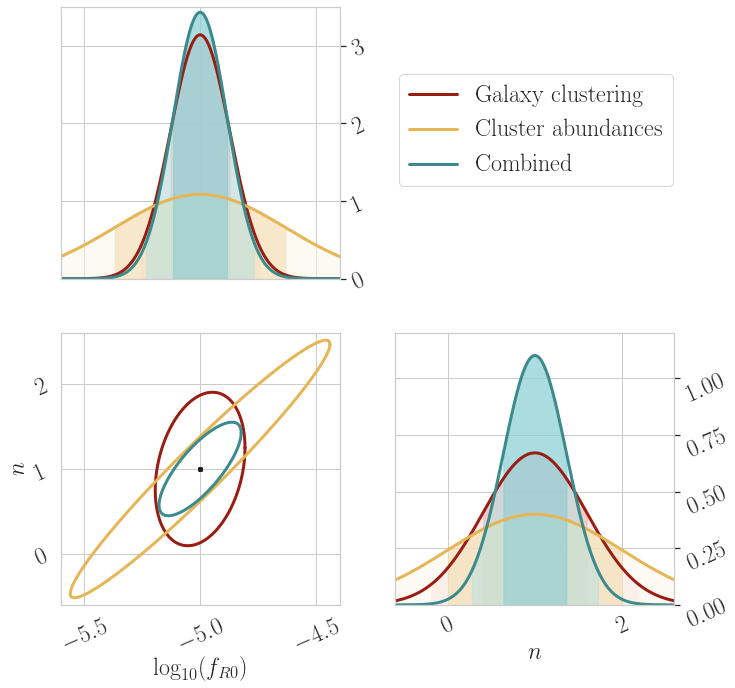

In [6]:
#Corner plot of the combined results
plt.rcParams.update({'font.size': 25})
pars = [-5, 1]
fR0_fid = pars[0]
n_fid = pars[1]
fR0_range = 0.6
n_range = 1.6
fig, axs = plt.subplots(2, 2, figsize=(11, 11))
paramlabels = [r'$\text{log}_{10}(f_{R0})$', r'$n$']
legnlabels = [r'Galaxy clustering', r'Cluster abundances', r'Combined']
labelfont = 24
lw = 3.
gaussbar = [['#991d13', '#edafab', '#f7d9d7'], ['#e6b555', '#f2d9a6', '#fcf5e9'], ['#3b8a8c', '#82c9d1', '#afe2e3'],\
             ['#49BEF4', '#C0E7F9', '#D9EEF7'], ['#A77CF2' ,'#E2D4F9', '#EEE7FA']]
def gauss(x, fR0_fid, sigma):
    return np.exp(- (fR0_fid - x)**2/(2 * sigma**2))/(np.sqrt(2 * np.pi) * sigma)


Cov_gauss = np.array([CovF5_gal[-2:].T[-2:].T, np.linalg.inv(Fish5), CovF5_n_margin[-2:].T[-2:].T])
sigmasfr = np.array([F5_galfr, Margn5[0], F5_n_marginfr])
sigmasn = np.array([F5_galn, Margn5[1], F5_n_marginn])
alpha = 1.52

#Go over each subplot and plot the data
for i in range(2):
        for j in range(2):
            grid = axs[i][j]
            
            #Set the plot range
            grid.set_xlim(fR0_fid - fR0_range, fR0_fid + fR0_range) if j == 0 else grid.set_xlim(n_fid - n_range, n_fid + n_range)
            if i != j:
                grid.set_ylim(n_fid - n_range, n_fid + n_range)

            #Plot the 1-param analyses first
            if i == j == 0:
                x = np.linspace(fR0_fid - 0.8, fR0_fid + 0.8, 200)
                for l in range(len(sigmasfr)):
                    grid.plot(x, gauss(x, fR0_fid, sigmasfr[l]), color = gaussbar[l][0], linewidth = lw, label = legnlabels[l])
                    fills1 = np.linspace(fR0_fid - sigmasfr[l], fR0_fid + sigmasfr[l], 50)
                    fills2 = np.linspace(fR0_fid - 2 * sigmasfr[l], fR0_fid + 2 * sigmasfr[l], 50)
                    grid.fill_between(fills2, gauss(fills2, fR0_fid, sigmasfr[l]) , y2 = 0, color = gaussbar[l][2], alpha = 0.5)
                    grid.fill_between(fills1, gauss(fills1, fR0_fid, sigmasfr[l]) , y2 = 0, color = gaussbar[l][1], alpha = 0.5)
                    grid.set_ylim(ymin=0, ymax = 3.5)
            
            elif i == j == 1:
                x = np.linspace(n_fid - 1.7, n_fid + 1.7, 200)
                for l in range(len(sigmasn)):
                    grid.plot(x, gauss(x, n_fid, sigmasn[l]), color = gaussbar[l][0], linewidth = lw)#, label = legnlabels[l])
                    fills1 = np.linspace(n_fid - sigmasn[l], n_fid + sigmasn[l], 50)
                    fills2 = np.linspace(n_fid - 2 * sigmasn[l], n_fid + 2 * sigmasn[l], 50)
                    grid.fill_between(fills2, gauss(fills2, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][2], alpha = 0.5)
                    grid.fill_between(fills1, gauss(fills1, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][1], alpha = 0.5)
                    grid.set_ylim(ymin=0, ymax = 1.2)
            
            #Then plot the 2-param analyses
            elif i > j:
                for l in range(len(Cov_gauss)):
                    #Taking the Cholesky decomposition, where L is a lower triangular
                    L_fR = np.linalg.cholesky(Cov_gauss[l])
                    #Creating a unit circle of vectors
                    t = np.linspace(0, 2 * np.pi, 100000)
                    fcirc = np.array([np.cos(t), np.sin(t)])

                    #Making the linear transformation
                    meanblock = np.array([np.repeat(fR0_fid, 100000), np.repeat(n_fid, 100000)])

                    #Plot the fiducal value
                    grid.plot(fR0_fid, n_fid, marker='X', zorder=10, linestyle='none', color='k')


                    trans = np.dot(L_fR, fcirc) * alpha + meanblock
                    grid.plot(trans[0], trans[1], color = gaussbar[l][0], linewidth = lw)#, label = str(i + 1) + r'$\sigma$ confidence ellipse')

            #Eliminate the redundant axes in between, and redundant frames; tilt ticks, and label the axes
            grid.tick_params(labelsize = labelfont, labelrotation=24)

            #print([i, j])
            if i != 1:
                grid.xaxis.set_major_formatter(NullFormatter())
            elif i == 1:
                grid.set_xlabel(paramlabels[j], fontsize = labelfont)

            if j != 0 and i != j:
                grid.xaxis.set_major_formatter(NullFormatter())
            elif j == 0 and i != 0:
                grid.set_ylabel(paramlabels[i], fontsize = labelfont)
            if i < j:
                grid.set_frame_on(False)
                grid.xaxis.set_major_locator(NullLocator())
                grid.yaxis.set_major_locator(NullLocator())
            if i == j:
                grid.yaxis.tick_right()
#Add description
fig.legend(loc = 'upper right', bbox_to_anchor=(0.865, 0.79), fontsize = labelfont)
#axs[0][-1].text(0.5, 0.5, r'Marginalized constraints for fiducials $f_{R0} = 10^{-5}$, $n = 1$', fontsize = 19)
fig.savefig(rootpath + '/Remix_cornerF5.pdf', format='pdf', bbox_inches='tight', dpi=1200)

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

### $f_{R0} = 10^{-6}$

/Users/RayneLiu/.local/lib/python3.6/site-packages/orphics/stats.py:245: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


Saved plot to /Users/RayneLiu/Desktop/Research/Cosmology/Results_Reports/Plots_for_paper/Fisher_Forecasts/F6LRG+ELG_Full.pdf


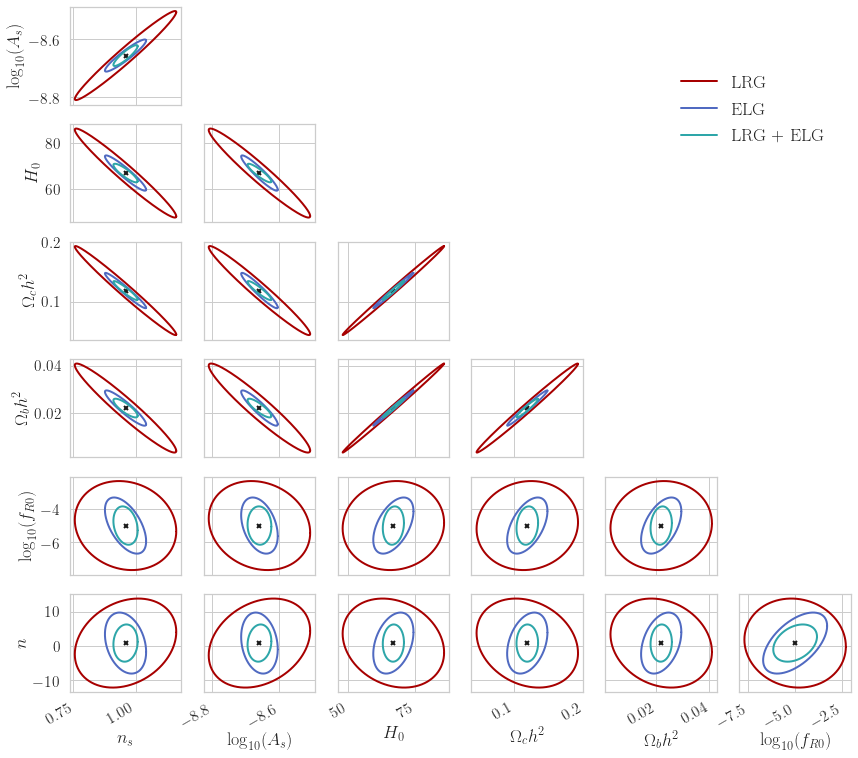

In [7]:
#Galaxy clustering alone

#Load the Fisher matrices
LRGF6_matt_Xi024 = np.loadtxt('FisherLRGF6_matt_xi024.txt', unpack = True)
ELGF6_matt_Xi024 = np.loadtxt('FisherELGF6_matt_xi024.txt', unpack = True)
LRGnELGF6_matt_Xi024 = LRGF6_matt_Xi024 + ELGF6_matt_Xi024

#Define the Fisher matrix
#The sequence of parameters see Georgios' email on May 28:
#[n_s, log_{10}(A_s), H_0, \Omega_c h^2, \Omega_b h^2, b_1, \sigma_{RSD}', \log_{10}(f_{R_0}), n]
lrgF6_matt_xi024 = FisherMatrix(
        LRGF6_matt_Xi024,
        ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         r'\text{log}_{10}(f_{R0})', 'n']
    )
elgF6_matt_xi024 = FisherMatrix(
        ELGF6_matt_Xi024,
        ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         r'\text{log}_{10}(f_{R0})', 'n']
    )

fisherF6_matt = [lrgF6_matt_xi024,
               elgF6_matt_xi024,
               lrgF6_matt_xi024 + elgF6_matt_xi024,
]

#Start plotting
plotlabels = [r'LRG', \
              r'ELG', \
              r'LRG + ELG']
paramsfish = ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', r'\text{log}_{10}(f_{R0})', 'n']
corner_plot(fisherF6_matt, plotlabels, \
            fid_dict = {'n_s':0.96, r'\text{log}_{10}(A_s)': np.log10(2.2e-9), 'H_0':67.0, '\Omega_c h^2':0.1194, \
                        '\Omega_b h^2':0.022, r'\text{log}_{10}(f_{R0})': -5.0, 'n': 1.0}, \
            colors = color_for_ellipses6, params = paramsfish, lw=2, labelsize=18, rotate_xlabels = True, gridline = True, loc='upper right', save_file=rootpath+'/F6LRG+ELG_Full.pdf')

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


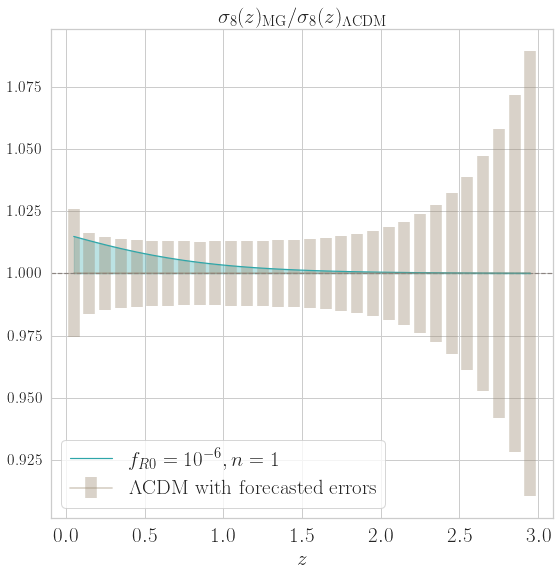

Testing partial derivative over log10(f_R0)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over log10(f_R0) converges nicely, proceeding to partial derivative over n
Testing partia

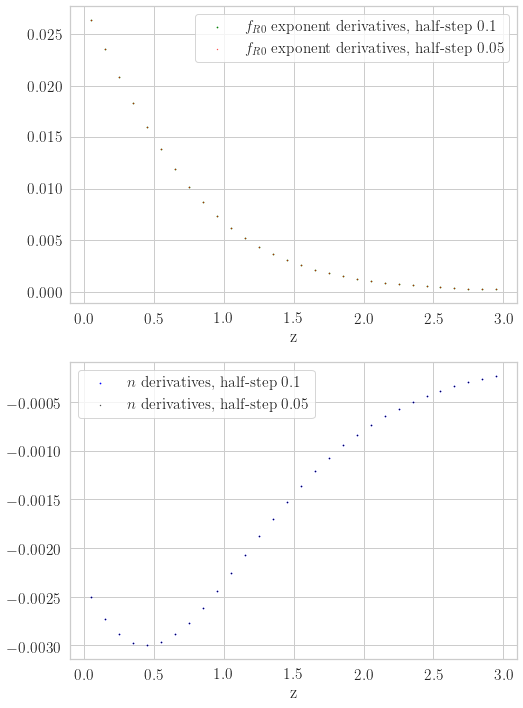

We are now looking at the redshifts:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]
The chosen derivative matrix is:
[[ 0.0263819  -0.00250414]
 [ 0.02355679 -0.00272783]
 [ 0.02085511 -0.00288495]
 [ 0.01831779 -0.00297466]
 [ 0.01597229 -0.00300028]
 [ 0.01383426 -0.00296826]
 [ 0.01190954 -0.00288705]
 [ 0.01019618 -0.00276613]
 [ 0.00868636 -0.00261518]
 [ 0.00736805 -0.00244346]
 [ 0.00622649 -0.00225934]
 [ 0.0052453  -0.00207003]
 [ 0.00440752 -0.00188145]
 [ 0.00369634 -0.00169823]
 [ 0.00309562 -0.00152376]
 [ 0.00259033 -0.00136034]
 [ 0.00216677 -0.00120935]
 [ 0.00181267 -0.00107141]
 [ 0.00151722 -0.00094657]
 [ 0.00127104 -0.00083448]
 [ 0.00106608 -0.00073446]
 [ 0.00089548 -0.0006457 ]
 [ 0.00075345 -0.00056725]
 [ 0.00063514 -0.00049814]
 [ 0.00053649 -0.00043743]
 [ 0.00045414 -0.0003842 ]
 [ 0.00038529 -0.0003376 ]
 [ 0.00032763 -0.00029683]
 [ 0.00027926 -0.000

0

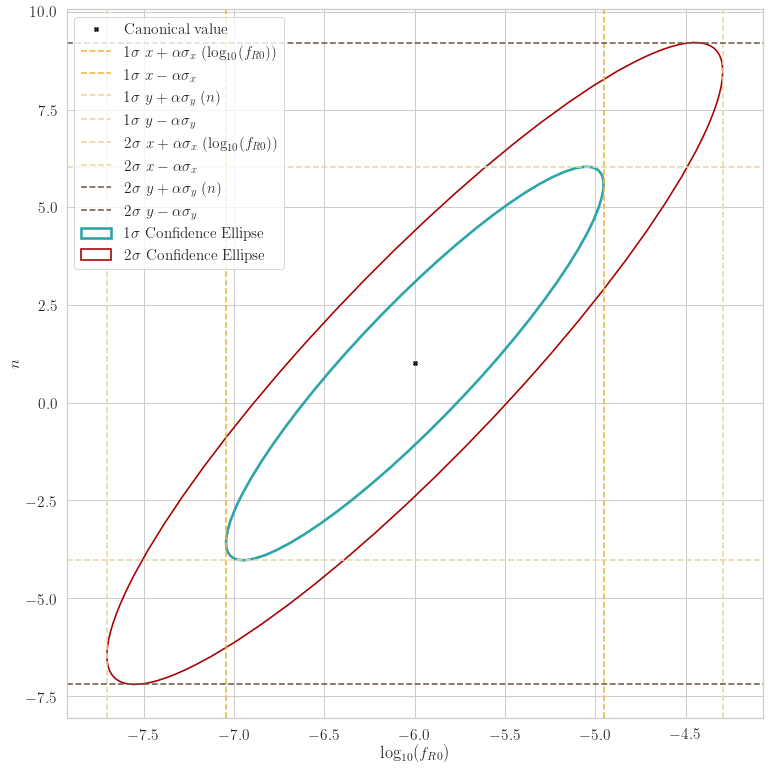

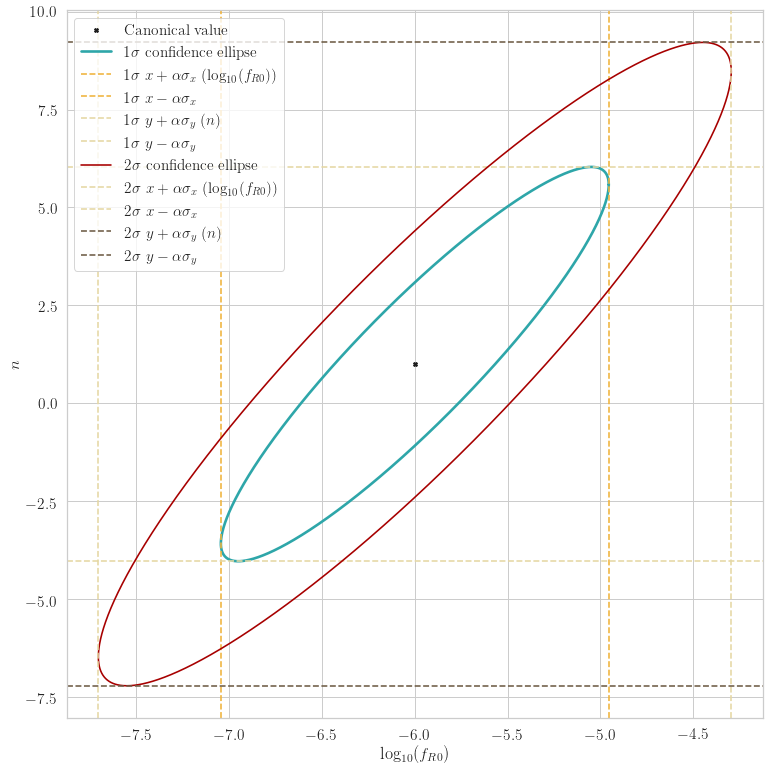

In [8]:
#Cluster abundances alone

z = np.linspace(0.05, 2.95, 30)
k = Cm._p(z)[0] #Sneakyly called the hidden methods. 
                #Won't make that public though, essentially it is np.logspace(-4, 1, 513)
var = (z, k)
labels = r'$f_{R0} = 10^{-6}, n=1$'
pars = [-6, 1]
HS.set_axeslabels([r'$\text{log}_{10}(f_{R0})$', r'$n$'])
HS.set_printables(['log10(f_R0)', 'n'])
Fish6, Margn6, Block6 = Fisher_MG_final.modelanalysis(HS, var, pars = pars, labels = labels, save = False)

os.system('afplay /System/Library/Sounds/Submarine.aiff')

In [9]:
print(Fish6)
print(Margn6)
print(Block6)

[[12.34248758 -2.33085499]
 [-2.33085499  0.5313309 ]]
[0.687218242865713, 3.312176653443237]
[0.28464178 1.37188423]


In [10]:
#Combination of results and presentation of errors


#From galaxy clustering
CovF6_LRG = np.linalg.inv(LRGF6_matt_Xi024)
F6_LRGfr = np.sqrt(CovF6_LRG[-2][-2])
F6_LRGn = np.sqrt(CovF6_LRG[-1][-1])
print('Error of log10(f_R0) from LRG:')
print(F6_LRGfr)
print('Error of n from LRG:')
print(F6_LRGn)

CovF6_ELG = np.linalg.inv(ELGF6_matt_Xi024)
F6_ELGfr = np.sqrt(CovF6_ELG[-2][-2])
F6_ELGn = np.sqrt(CovF6_ELG[-1][-1])
print('Error of log10(f_R0) from ELG:')
print(F6_ELGfr)
print('Error of n from ELG:')
print(F6_ELGn)

CovF6_gal = np.linalg.inv(LRGnELGF6_matt_Xi024)
F6_galfr = np.sqrt(CovF6_gal[-2][-2])
F6_galn = np.sqrt(CovF6_gal[-1][-1])
print('Error of log10(f_R0) from galaxy clustering:')
print(F6_galfr)
print('Error of n from galaxy clustering:')
print(F6_galn)


#From cluster abundances
print('Error of log10(f_R0) from cluster abundances:')
print(Margn6[0])
print('Error of n from cluster abundances:')
print(Margn6[1])


#Combined
FishF6_n_margin = copy.deepcopy(LRGnELGF6_matt_Xi024)
FishF6_n_margin[-1][-1] = copy.deepcopy(LRGnELGF6_matt_Xi024[-1][-1]) + copy.deepcopy(Fish6[-1][-1])
FishF6_n_margin[-1][-2] = copy.deepcopy(LRGnELGF6_matt_Xi024[-1][-2]) + copy.deepcopy(Fish6[-1][-2])
FishF6_n_margin[-2][-1] = copy.deepcopy(LRGnELGF6_matt_Xi024[-2][-1]) + copy.deepcopy(Fish6[-2][-1])
FishF6_n_margin[-2][-2] = copy.deepcopy(LRGnELGF6_matt_Xi024[-2][-2]) + copy.deepcopy(Fish6[-2][-2])

CovF6_n_margin = np.linalg.inv(FishF6_n_margin)
F6_n_marginfr = np.sqrt(CovF6_n_margin[-2][-2])
F6_n_marginn = np.sqrt(CovF6_n_margin[-1][-1])
print('Error of log10(f_R0) combined:')
print(F6_n_marginfr)
print('Error of n combined:')
print(F6_n_marginn)

Error of log10(f_R0) from LRG:
1.777904656684453
Error of n from LRG:
8.635437673070737
Error of log10(f_R0) from ELG:
1.1216752092733002
Error of n from ELG:
5.9219807462019896
Error of log10(f_R0) from galaxy clustering:
0.7663054718409149
Error of n from galaxy clustering:
3.6112704859203095
Error of log10(f_R0) from cluster abundances:
0.687218242865713
Error of n from cluster abundances:
3.312176653443237
Error of log10(f_R0) combined:
0.4776092962968681
Error of n combined:
2.294774599175255


In [23]:
2.4186 - 2.2947

0.1238999999999999

### Compared to the error [0.4775, 2.4186] that we got previously, there is a slight improvement but not much.

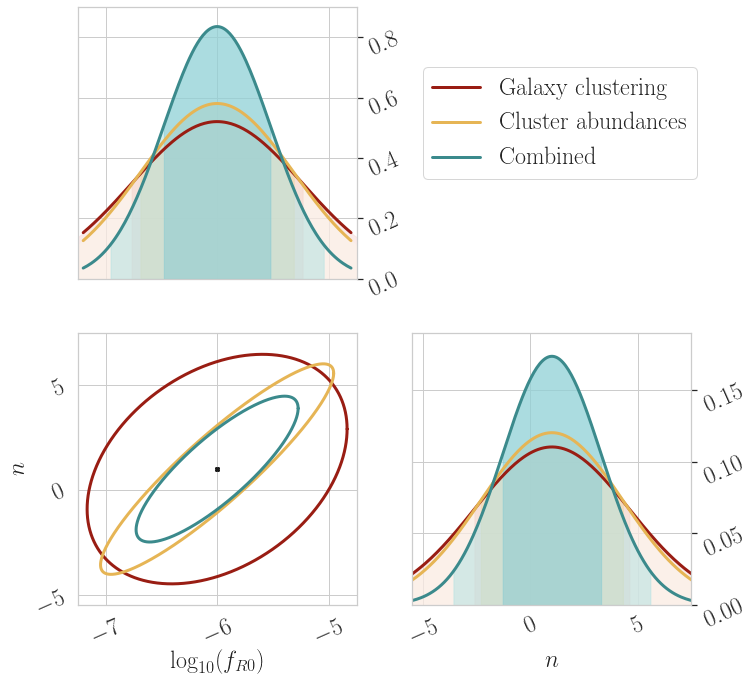

In [11]:
#Corner plot of the combined results
plt.rcParams.update({'font.size': 25})
pars = [-6, 1]
fR0_fid = pars[0]
n_fid = pars[1]
fR0_range = 1.25
n_range = 6.5
fig, axs = plt.subplots(2, 2, figsize=(11, 11))
paramlabels = [r'$\text{log}_{10}(f_{R0})$', r'$n$']
legnlabels = [r'Galaxy clustering', r'Cluster abundances', r'Combined']
labelfont = 24
lw = 3.
gaussbar = [['#991d13', '#edafab', '#f7d9d7'], ['#e6b555', '#f2d9a6', '#fcf5e9'], ['#3b8a8c', '#82c9d1', '#afe2e3'],\
             ['#49BEF4', '#C0E7F9', '#D9EEF7'], ['#A77CF2' ,'#E2D4F9', '#EEE7FA']]
def gauss(x, fR0_fid, sigma):
    return np.exp(- (fR0_fid - x)**2/(2 * sigma**2))/(np.sqrt(2 * np.pi) * sigma)


Cov_gauss = np.array([CovF6_gal[-2:].T[-2:].T, np.linalg.inv(Fish6), CovF6_n_margin[-2:].T[-2:].T])
sigmasfr = np.array([F6_galfr, Margn6[0], F6_n_marginfr])
sigmasn = np.array([F6_galn, Margn6[1], F6_n_marginn])
alpha = 1.52

#Go over each subplot and plot the data
for i in range(2):
        for j in range(2):
            grid = axs[i][j]
            
            #Set the plot range
            grid.set_xlim(fR0_fid - fR0_range, fR0_fid + fR0_range) if j == 0 else grid.set_xlim(n_fid - n_range, n_fid + n_range)
            if i != j:
                grid.set_ylim(n_fid - n_range, n_fid + n_range)

            #Plot the 1-param analyses first
            if i == j == 0:
                x = np.linspace(fR0_fid - 1.2, fR0_fid + 1.2, 200)
                for l in range(len(sigmasfr)):
                    grid.plot(x, gauss(x, fR0_fid, sigmasfr[l]), color = gaussbar[l][0], linewidth = lw, label = legnlabels[l])
                    fills1 = np.linspace(fR0_fid - sigmasfr[l], fR0_fid + sigmasfr[l], 50)
                    fills2 = np.linspace(fR0_fid - 2 * sigmasfr[l], fR0_fid + 2 * sigmasfr[l], 50)
                    grid.fill_between(fills2, gauss(fills2, fR0_fid, sigmasfr[l]) , y2 = 0, color = gaussbar[l][2], alpha = 0.5)
                    grid.fill_between(fills1, gauss(fills1, fR0_fid, sigmasfr[l]) , y2 = 0, color = gaussbar[l][1], alpha = 0.5)
                    grid.set_ylim(ymin=0, ymax = 0.9)
            
            elif i == j == 1:
                x = np.linspace(n_fid - (n_range+0.2), n_fid + (n_range+0.2), 200)
                for l in range(len(sigmasn)):
                    grid.plot(x, gauss(x, n_fid, sigmasn[l]), color = gaussbar[l][0], linewidth = lw)#, label = legnlabels[l])
                    fills1 = np.linspace(n_fid - sigmasn[l], n_fid + sigmasn[l], 50)
                    fills2 = np.linspace(n_fid - 2 * sigmasn[l], n_fid + 2 * sigmasn[l], 50)
                    grid.fill_between(fills2, gauss(fills2, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][2], alpha = 0.5)
                    grid.fill_between(fills1, gauss(fills1, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][1], alpha = 0.5)
                    grid.set_ylim(ymin=0, ymax = 0.19)
            
            #Then plot the 2-param analyses
            elif i > j:
                for l in range(len(Cov_gauss)):
                    #Taking the Cholesky decomposition, where L is a lower triangular
                    L_fR = np.linalg.cholesky(Cov_gauss[l])
                    #Creating a unit circle of vectors
                    t = np.linspace(0, 2 * np.pi, 100000)
                    fcirc = np.array([np.cos(t), np.sin(t)])

                    #Making the linear transformation
                    meanblock = np.array([np.repeat(fR0_fid, 100000), np.repeat(n_fid, 100000)])

                    #Plot the fiducal value
                    grid.plot(fR0_fid, n_fid, marker='X', zorder=10, linestyle='none', color='k')


                    trans = np.dot(L_fR, fcirc) * alpha + meanblock
                    grid.plot(trans[0], trans[1], color = gaussbar[l][0], linewidth = lw)#, label = str(i + 1) + r'$\sigma$ confidence ellipse')

            #Eliminate the redundant axes in between, and redundant frames; tilt ticks, and label the axes
            grid.tick_params(labelsize = labelfont, labelrotation=24)

            #print([i, j])
            if i != 1:
                grid.xaxis.set_major_formatter(NullFormatter())
            elif i == 1:
                grid.set_xlabel(paramlabels[j], fontsize = labelfont)

            if j != 0 and i != j:
                grid.xaxis.set_major_formatter(NullFormatter())
            elif j == 0 and i != 0:
                grid.set_ylabel(paramlabels[i], fontsize = labelfont)
            if i < j:
                grid.set_frame_on(False)
                grid.xaxis.set_major_locator(NullLocator())
                grid.yaxis.set_major_locator(NullLocator())
            if i == j:
                grid.yaxis.tick_right()
#Add description
fig.legend(loc = 'upper right', bbox_to_anchor=(0.895, 0.79), fontsize = labelfont)
#axs[0][-1].text(0.5, 0.5, r'Marginalized constraints for fiducials $f_{R0} = 10^{-6}$, $n = 1$', fontsize = 19)
fig.savefig(rootpath + '/Remix_cornerF6.pdf', format='pdf', bbox_inches='tight', dpi=1200)

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

### near-GR

/Users/RayneLiu/.local/lib/python3.6/site-packages/orphics/stats.py:245: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


Saved plot to /Users/RayneLiu/Desktop/Research/Cosmology/Results_Reports/Plots_for_paper/Fisher_Forecasts/GRLRG+ELG_Full.pdf


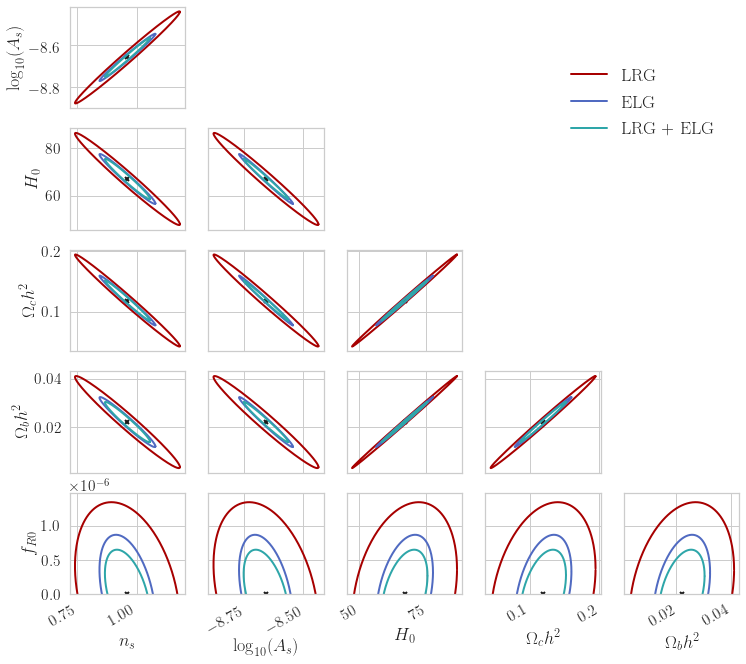

In [12]:
#Galaxy clustering alone

#Load the Fisher matrices
LRG_GR_Xi024_matt = np.loadtxt('FisherLRG_GR_Xi024_matt.txt', unpack = True)
ELG_GR_Xi024_matt = np.loadtxt('FisherELG_GR_Xi024_matt.txt', unpack = True)
LRGnELG_GR_Xi024_matt = LRG_GR_Xi024_matt + ELG_GR_Xi024_matt

#Define the Fisher matrix
#The sequence of parameters see Georgios' email on May 28:
#[n_s, log_{10}(A_s), H_0, \Omega_c h^2, \Omega_b h^2, b_1, \sigma_{RSD}', \log_{10}(f_{R_0}), n]
#(Which is modified for the near-GR case since there's no n, and only f_{R0})
lrg_GR_Xi024_matt = FisherMatrix(
        LRG_GR_Xi024_matt,
        ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         r'f_{R0}']
    )
elg_GR_Xi024_matt = FisherMatrix(
        ELG_GR_Xi024_matt,
        ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         r'f_{R0}']
    )

fisher_GR_matt = [lrg_GR_Xi024_matt,
                  elg_GR_Xi024_matt,
                  lrg_GR_Xi024_matt + elg_GR_Xi024_matt,
]

#Start plotting
plotlabels = [r'LRG', \
              r'ELG', \
              r'LRG + ELG']
paramsfish = ['n_s', r'\text{log}_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', r'f_{R0}']
corner_plot(fisher_GR_matt, plotlabels, \
            fid_dict = {'n_s':0.96, r'\text{log}_{10}(A_s)': np.log10(2.2e-9), 'H_0':67.0, '\Omega_c h^2':0.1194, \
                        '\Omega_b h^2':0.022, r'f_{R0}': 0.}, \
            colors = color_for_ellipses6, params = paramsfish, lw=2, labelsize=18, rotate_xlabels = True, gridline = True, one_sided = True, loc='upper right', save_file=rootpath+'/GRLRG+ELG_Full.pdf')

In [16]:
#Make some modifications to the cornerplot code
from orphics import stats
print(stats.__file__)

/Users/RayneLiu/.local/lib/python3.6/site-packages/orphics/stats.py


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


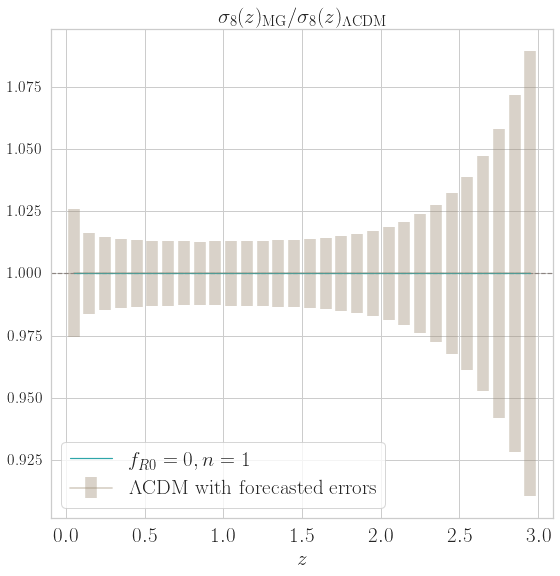

The fiducial is now 0, we can only test partial derivative over f_R0 itself
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over log10(f_R0) converges nicely, proceeding to partial 

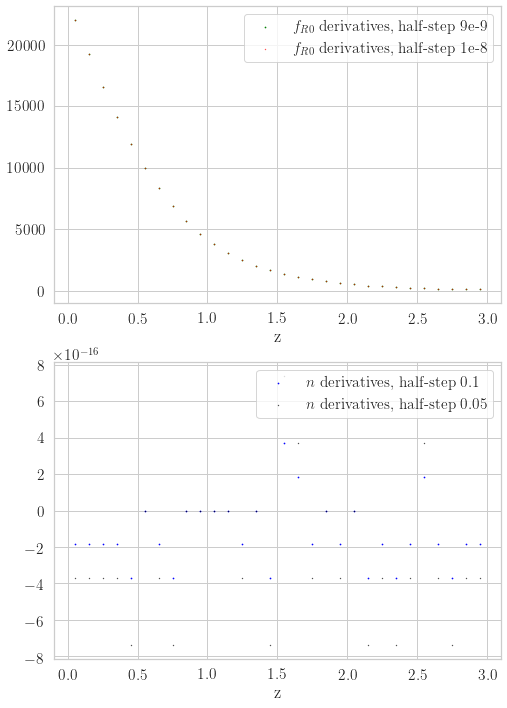

Partial derivatives over n is all-zero, now doing a singular Fisher analysis about f_R0
[-3.70074342e-16 -3.70074342e-16 -3.70074342e-16 -3.70074342e-16
 -7.40148683e-16  0.00000000e+00 -3.70074342e-16 -7.40148683e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.70074342e-16  0.00000000e+00 -7.40148683e-16  7.40148683e-16
  3.70074342e-16 -3.70074342e-16  0.00000000e+00 -3.70074342e-16
  0.00000000e+00 -7.40148683e-16 -3.70074342e-16 -7.40148683e-16
 -3.70074342e-16  3.70074342e-16 -3.70074342e-16 -7.40148683e-16
 -3.70074342e-16 -3.70074342e-16]
The other derivative array:
[22025.64669232 19246.97361693 16608.36893566 14168.79115258
 11966.06548441 10018.08947609  8326.07964041  6878.75677595
  5656.57839822  4635.44449554  3789.60531059  3093.7259765
  2524.19969439  2059.86283     1682.27578398  1375.71521372
  1126.9930809    925.18656721   761.33552419   628.14271133
   519.69663192   431.22631655   358.89084812   299.60254926
   250.88077538   210.73241075

0

In [13]:
#Cluster abundances alone

z = np.linspace(0.05, 2.95, 30)
k = Cm._p(z)[0] #Sneakyly called the hidden methods. 
                #Won't make that public though, essentially it is np.logspace(-4, 1, 513)
var = (z, k)
labels = r'$f_{R0} = 0, n=1$'
pars = [0, 1]
HS.set_axeslabels([r'$f_{R0}$', r'$n$'])
HS.set_printables(['f_R0', 'n'])
Fish0, Margn0 = Fisher_MG_final.modelanalysis(HS, var, pars = pars, labels = labels, save = False)

os.system('afplay /System/Library/Sounds/Submarine.aiff')

In [18]:
print(Fish0)
print(Margn0)

[[7.04641499e+12]]
3.767175833511533e-07


In [14]:
#Combination of results and presentation of errors


#From galaxy clustering
CovGR_LRG = np.linalg.inv(LRG_GR_Xi024_matt)
GR_LRGfr = np.sqrt(CovGR_LRG[-1][-1])
print('Error of f_R0 from LRG:')
print(GR_LRGfr)

CovGR_ELG = np.linalg.inv(ELG_GR_Xi024_matt)
GR_ELGfr = np.sqrt(CovGR_ELG[-1][-1])
print('Error of f_R0 from ELG:')
print(GR_ELGfr)

CovGR_gal = np.linalg.inv(LRGnELG_GR_Xi024_matt)
GR_galfr = np.sqrt(CovGR_gal[-1][-1])
print('Error of f_R0 from galaxy clustering:')
print(GR_galfr)


#From cluster abundances
print('Error of f_R0 from cluster abundances:')
print(Margn0)


#Combined
FishGR = copy.deepcopy(LRGnELG_GR_Xi024_matt)
FishGR[-1][-1] = copy.deepcopy(LRGnELG_GR_Xi024_matt[-1][-1]) + copy.deepcopy(Fish0[-1][-1])

CovGR = np.linalg.inv(FishGR)
GRfr = np.sqrt(CovGR[-1][-1])
print('Error of f_R0 combined:')
print(GRfr)

Error of f_R0 from LRG:
8.925437450201212e-07
Error of f_R0 from ELG:
5.766737470166196e-07
Error of f_R0 from galaxy clustering:
4.321251507528359e-07
Error of f_R0 from cluster abundances:
3.767175833511533e-07
Error of f_R0 combined:
2.8396168941035956e-07


In [24]:
2.8396-2.7387

0.10089999999999977

### Compared to the error 2.738713358228284e-07 that we got previously, it got a little bit worse but not too much...

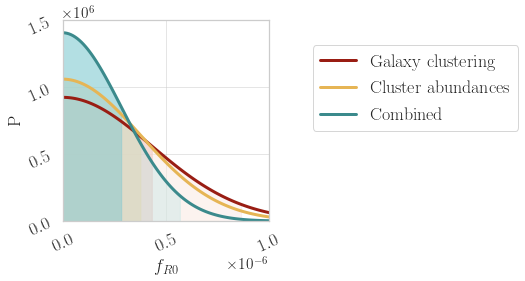

In [25]:
#Plot the Gaussian constraint curve for f_{R0}
fR0_fid = 0
sigmas = [GR_galfr, Margn0, GRfr] 
labels = [r'Galaxy clustering', r'Cluster abundances', r'Combined']
gauss0bar = [['#991d13', '#edafab', '#f7d9d7'], ['#e6b555', '#f2d9a6', '#fcf5e9'], ['#3b8a8c', '#82c9d1', '#afe2e3'],\
             ['#49BEF4', '#C0E7F9', '#D9EEF7'], ['#A77CF2' ,'#E2D4F9', '#EEE7FA']]
labelfont = 18
lw = 3.
x = np.linspace(fR0_fid, fR0_fid + 1e-6, 100)
plt.figure(figsize = (3.7, 3.7))
plt.grid(alpha = 1.5)
def gauss(x, fR0_fid, sigma):
    return np.exp(- (fR0_fid - x)**2/(2 * sigma**2))/(np.sqrt(2 * np.pi) * sigma)


for i in range(len(sigmas)):
    plt.plot(x, gauss(x, fR0_fid, sigmas[i]), color = gauss0bar[i][0], linewidth = lw, label = labels[i])
    #plt.axvline(x = fR0_fid - sigma, ymax = 0.79, ls = '--', color = colorbar[2], label = r'$1-\sigma$')
    #plt.axvline(x = fR0_fid + sigma, ymax = 0.79, ls = '--', color = colorbar[2])
    fills1 = np.linspace(fR0_fid, fR0_fid + sigmas[i], 50)
    fills2 = np.linspace(fR0_fid, fR0_fid + 2 * sigmas[i], 50)
    plt.fill_between(fills2, gauss(fills2, fR0_fid, sigmas[i]) , y2 = 0, color = gauss0bar[i][2], alpha = 0.3)
    plt.fill_between(fills1, gauss(fills1, fR0_fid, sigmas[i]) , y2 = 0, color = gauss0bar[i][1], alpha = 0.5)
    plt.xlabel(r'$f_{R0}$', fontsize = labelfont)
    plt.ylabel(r'P', fontsize = labelfont)
    plt.ylim(ymin=0, ymax = 1.5e6) 
    plt.xlim(xmin=0, xmax = 1e-6) 
plt.tick_params(labelsize = labelfont, labelrotation=24)
#plt.title(r'One-sided constraints in the GR limiting case')
plt.legend(loc = 'upper right', bbox_to_anchor=(2.25, 0.92), fontsize = labelfont)
plt.savefig(rootpath+'/GRcombinedGaussian.pdf', format='pdf', bbox_inches='tight', dpi=1200)
plt.show()

### $n_{DGP} = 1$

### <font text color = red>The new results are in, and the old results are replaced

/Users/RayneLiu/.local/lib/python3.6/site-packages/orphics/stats.py:245: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


Saved plot to /Users/RayneLiu/Desktop/Research/Cosmology/Results_Reports/Plots_for_paper/Fisher_Forecasts/DGPn1_LRG+ELG_Full.pdf


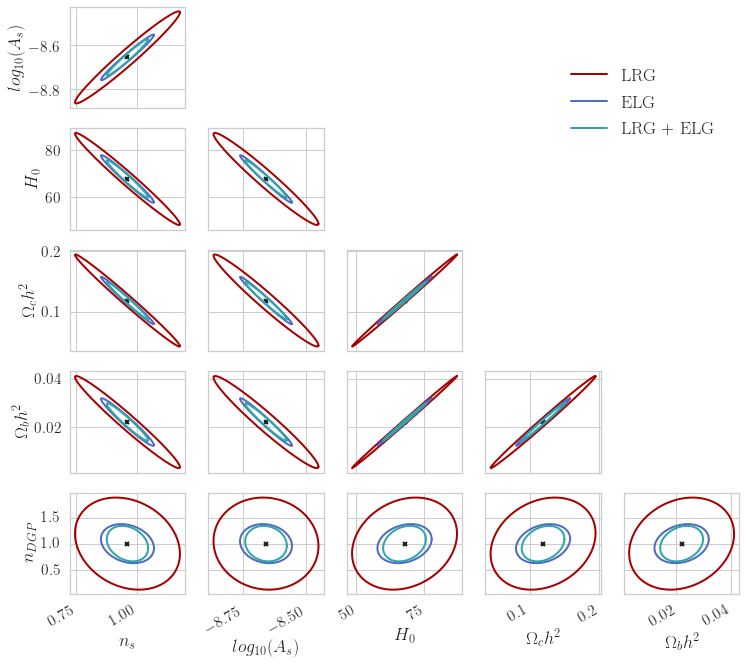

In [48]:
#Galaxy clustering alone
LRG_DGPn1_Xi024 = np.loadtxt('FisherLRG_DGPn1_xi024.txt', unpack = True)
ELG_DGPn1_Xi024 = np.loadtxt('FisherELG_DGPn1_xi024.txt', unpack = True)
LRGnELG_DGPn1_Xi024 = LRG_DGPn1_Xi024 + ELG_DGPn1_Xi024
#Define the Fisher matrix
lrg_DGPn1_xi024 = FisherMatrix(
        LRG_DGPn1_Xi024,
        ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         'n_{DGP}']
    )
elg_DGPn1_xi024 = FisherMatrix(
        ELG_DGPn1_Xi024,
        ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         'n_{DGP}']
    )
fisher = [lrg_DGPn1_xi024,
          elg_DGPn1_xi024,
          lrg_DGPn1_xi024 + elg_DGPn1_xi024,
]

#Start plotting
plotlabels = [r'LRG', \
              r'ELG',
              r'LRG + ELG']
paramsfish = ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'n_{DGP}']
corner_plot(fisher, plotlabels, \
            fid_dict = {'n_s':0.96, 'log_{10}(A_s)':np.log10(2.2e-9), 'H_0':67.77, '\Omega_c h^2':0.1194, \
                        '\Omega_b h^2':0.022, 'n_{DGP}': 1.0}, \
            colors = color_for_ellipses6, params = paramsfish, lw=2, labelsize=18, rotate_xlabels = True, gridline = True, loc='upper right', save_file=rootpath+'/DGPn1_LRG+ELG_Full.pdf')

/Users/RayneLiu/.local/lib/python3.6/site-packages/orphics/stats.py:245: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


Saved plot to /Users/RayneLiu/Desktop/Research/Cosmology/Results_Reports/Plots_for_paper/Fisher_Forecasts/DGPn1_LRG+ELG_Full.pdf


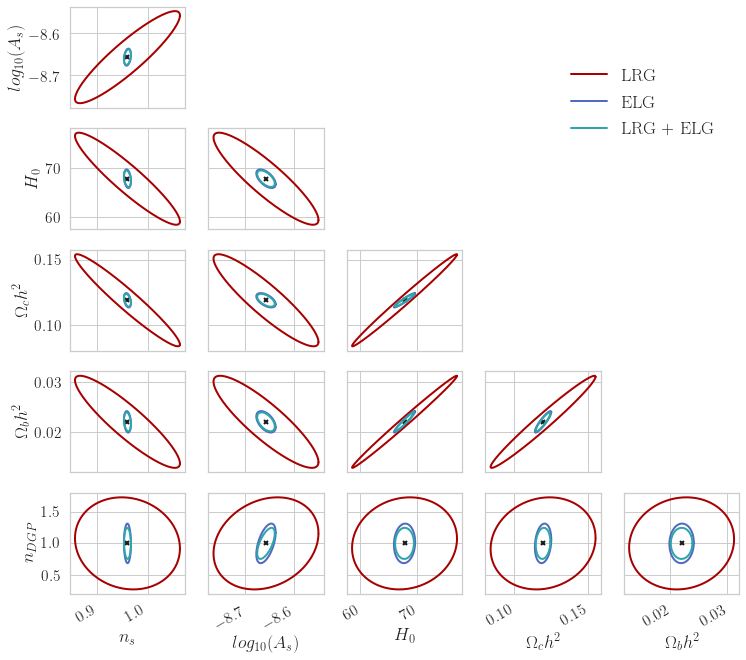

In [20]:
#Old results
LRG_DGPn1_Xi024 = np.loadtxt('FisherLRG_DGPn1_xi024.txt', unpack = True)
ELG_DGPn1_Xi024 = np.loadtxt('FisherELG_DGPn1_xi024.txt', unpack = True)
LRGnELG_DGPn1_Xi024 = LRG_DGPn1_Xi024 + ELG_DGPn1_Xi024
#Define the Fisher matrix
lrg_DGPn1_xi024 = FisherMatrix(
        LRG_DGPn1_Xi024,
        ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         'n_{DGP}']
    )
elg_DGPn1_xi024 = FisherMatrix(
        ELG_DGPn1_Xi024,
        ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         'n_{DGP}']
    )
fisher = [lrg_DGPn1_xi024,
          elg_DGPn1_xi024,
          lrg_DGPn1_xi024 + elg_DGPn1_xi024,
]

#Start plotting
plotlabels = [r'LRG', \
              r'ELG',
              r'LRG + ELG']
paramsfish = ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'n_{DGP}']
corner_plot(fisher, plotlabels, \
            fid_dict = {'n_s':0.96, 'log_{10}(A_s)':np.log10(2.2e-9), 'H_0':67.77, '\Omega_c h^2':0.1194, \
                        '\Omega_b h^2':0.022, 'n_{DGP}': 1.0}, \
            colors = color_for_ellipses6, params = paramsfish, lw=2, labelsize=18, rotate_xlabels = True, gridline = True, loc='upper right', save_file=rootpath+'/DGPn1_LRG+ELG_Full.pdf')

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


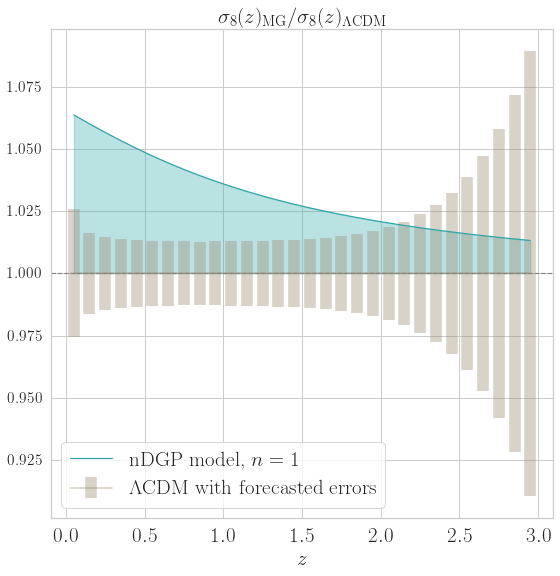

Testing partial derivative over n
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over n converges nicely
The chosen derivative array is:
[[-0.05098609]
 [-0.04846405]
 [-0.04600434

0

In [40]:
#Cluster abundances alone
var = (z, k)
pars = 1
labels = r'nDGP model, $n=1$'
Fishn1, Errn1 = Fisher_MG_final.modelanalysis(DGP, var, pars = pars, labels = labels)
os.system('afplay /System/Library/Sounds/Submarine.aiff')

In [49]:
#From galaxy clustering
CovDGPn1_LRG = np.linalg.inv(LRG_DGPn1_Xi024)
DGPn1_LRG = np.sqrt(CovDGPn1_LRG[-1][-1])
print('Error of n_DGP from LRG:')
print(DGPn1_LRG)

CovDGPn1_ELG = np.linalg.inv(ELG_DGPn1_Xi024)
DGPn1_ELG = np.sqrt(CovDGPn1_ELG[-1][-1])
print('Error of n_DGP from ELG:')
print(DGPn1_ELG)

CovDGPn1_gal = np.linalg.inv(LRGnELG_DGPn1_Xi024)
DGPn1_gal = np.sqrt(CovDGPn1_gal[-1][-1])
print('Error of n_DGP from galaxy clustering:')
print(DGPn1_gal)
DGPn1_gal = np.sqrt(CovDGPn1_gal[-1][-1])

#Combined with cluster abundances
FishDGPn1 = copy.deepcopy(LRGnELG_DGPn1_Xi024)
Covn1 = np.linalg.inv(Fishn1)
FishDGPn1[-1][-1] = copy.deepcopy(LRGnELG_DGPn1_Xi024[-1][-1]) + copy.deepcopy(Fishn1[-1][-1])

CovDGPn1_comb = np.linalg.inv(FishDGPn1)
DGPn1_comb = np.sqrt(CovDGPn1_comb[-1][-1])

print('Error of n_DGP from cluster abundances:')
print(Errn1)
print('Error of n_DGP combined:')
print(DGPn1_comb)

Error of n_DGP from LRG:
0.5850284308705052
Error of n_DGP from ELG:
0.2479766456364014
Error of n_DGP from galaxy clustering:
0.22570160193194283
Error of n_DGP from cluster abundances:
0.09404538891368716
Error of n_DGP combined:
0.08681071108160987


In [27]:
#Old results
#From galaxy clustering
CovDGPn1_LRG = np.linalg.inv(LRG_DGPn1_Xi024)
DGPn1_LRG = np.sqrt(CovDGPn1_LRG[-1][-1])
print('Error of n_DGP from LRG:')
print(DGPn1_LRG)

CovDGPn1_ELG = np.linalg.inv(ELG_DGPn1_Xi024)
DGPn1_ELG = np.sqrt(CovDGPn1_ELG[-1][-1])
print('Error of n_DGP from ELG:')
print(DGPn1_ELG)

CovDGPn1_gal = np.linalg.inv(LRGnELG_DGPn1_Xi024)
DGPn1_gal = np.sqrt(CovDGPn1_gal[-1][-1])
print('Error of n_DGP from galaxy clustering:')
print(DGPn1_gal)
DGPn1_gal = np.sqrt(CovDGPn1_gal[-1][-1])

#Combined with cluster abundances
FishDGPn1 = copy.deepcopy(LRGnELG_DGPn1_Xi024)
Covn1 = np.linalg.inv(Fishn1)
FishDGPn1[-1][-1] = copy.deepcopy(LRGnELG_DGPn1_Xi024[-1][-1]) + copy.deepcopy(Fishn1[-1][-1])

CovDGPn1_comb = np.linalg.inv(FishDGPn1)
DGPn1_comb = np.sqrt(CovDGPn1_comb[-1][-1])

print('Error of n_DGP from cluster abundances:')
print(Errn1)
print('Error of n_DGP combined:')
print(DGPn1_comb)

Error of n_DGP from LRG:
0.48439423111830004
Error of n_DGP from ELG:
0.20814417554243722
Error of n_DGP from galaxy clustering:
0.16362411442390706
Error of n_DGP from cluster abundances:
0.09404538891368716
Error of n_DGP combined:
0.08153682464516787


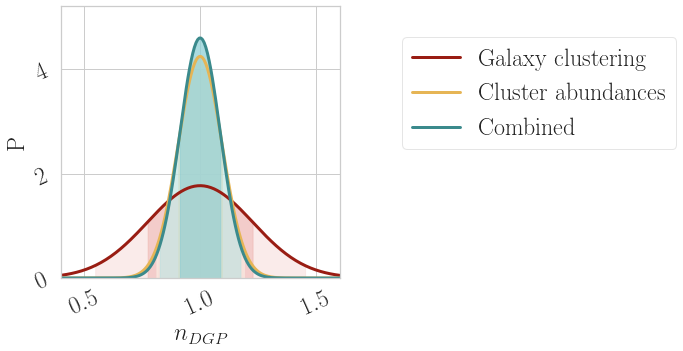

In [50]:
#Plot the combined scenario, only for n_DGP
n_fid = 1.
n_range = 0.6
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
paramlabels = [r'$n_{DGP}$']
legnlabels = [r'Galaxy clustering', 'Cluster abundances', r'Combined']
labelfont = 24
lw = 3.

Cov_gauss = np.array([CovDGPn1_gal[-1:].T[-1:].T, np.linalg.inv(Fishn1), CovDGPn1_comb[-1:].T[-1:].T])
sigmasn = np.array([DGPn1_gal, Errn1, DGPn1_comb])
alpha = 1.52
#print(sigmasn)

#Go over each subplot and plot the data - although I only have one grid, I still wanna keep the format
#So that I can use the features of axplot
#Set the plot range
axs.set_xlim(n_fid - n_range, n_fid + n_range)
axs.set_ylim(n_fid - n_range, n_fid + n_range)

#Plot the 1-param analyses
x = np.linspace(n_fid - 0.7, n_fid + 0.7, 200)
for l in range(len(sigmasn)):
    axs.plot(x, gauss(x, n_fid, sigmasn[l]), color = gaussbar[l][0], linewidth = lw, label = legnlabels[l])
    fills1 = np.linspace(n_fid - sigmasn[l], n_fid + sigmasn[l], 50)
    fills2 = np.linspace(n_fid - 2 * sigmasn[l], n_fid + 2 * sigmasn[l], 50)
    axs.fill_between(fills2, gauss(fills2, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][2], alpha = 0.5)
    axs.fill_between(fills1, gauss(fills1, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][1], alpha = 0.5)
    axs.set_ylim(ymin=0, ymax = 5.2)
axs.set_xlabel('$n_{DGP}$', fontsize = labelfont)
axs.set_ylabel('P', fontsize = labelfont)

axs.tick_params(labelsize = labelfont, labelrotation=24)

#Add description
axs.legend(loc='center right',bbox_to_anchor=(2.25,0.68), fontsize = labelfont, fancybox=True, framealpha=0.5)

#axs[0][-1].text(0.5, 0.5, r'Marginalized constraints for fiducials $f_{R0} = 10^{-5}$, $n = 1$', fontsize = 19)
fig.savefig(rootpath + '/Remix_gaussian_n1.pdf', format='pdf', bbox_inches='tight', dpi=1200)

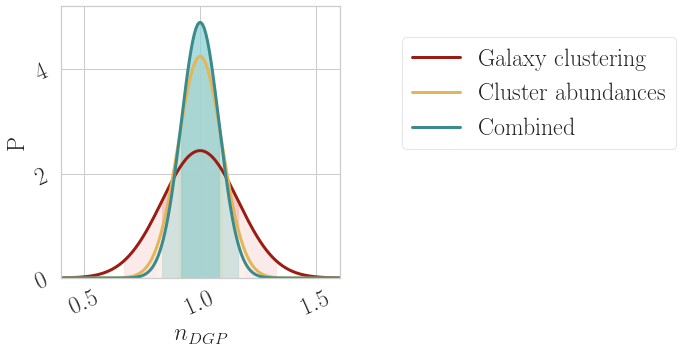

In [31]:
#OLD RESULTS
#Plot the combined scenario, only for n_DGP
n_fid = 1.
n_range = 0.6
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
paramlabels = [r'$n_{DGP}$']
legnlabels = [r'Galaxy clustering', 'Cluster abundances', r'Combined']
labelfont = 24
lw = 3.

Cov_gauss = np.array([CovDGPn1_gal[-1:].T[-1:].T, np.linalg.inv(Fishn1), CovDGPn1_comb[-1:].T[-1:].T])
sigmasn = np.array([DGPn1_gal, Errn1, DGPn1_comb])
alpha = 1.52
#print(sigmasn)

#Go over each subplot and plot the data - although I only have one grid, I still wanna keep the format
#So that I can use the features of axplot
#Set the plot range
axs.set_xlim(n_fid - n_range, n_fid + n_range)
axs.set_ylim(n_fid - n_range, n_fid + n_range)

#Plot the 1-param analyses
x = np.linspace(n_fid - 0.7, n_fid + 0.7, 200)
for l in range(len(sigmasn)):
    axs.plot(x, gauss(x, n_fid, sigmasn[l]), color = gaussbar[l][0], linewidth = lw, label = legnlabels[l])
    fills1 = np.linspace(n_fid - sigmasn[l], n_fid + sigmasn[l], 50)
    fills2 = np.linspace(n_fid - 2 * sigmasn[l], n_fid + 2 * sigmasn[l], 50)
    axs.fill_between(fills2, gauss(fills2, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][2], alpha = 0.5)
    axs.fill_between(fills1, gauss(fills1, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][1], alpha = 0.5)
    axs.set_ylim(ymin=0, ymax = 5.2)
axs.set_xlabel('$n_{DGP}$', fontsize = labelfont)
axs.set_ylabel('P', fontsize = labelfont)

axs.tick_params(labelsize = labelfont, labelrotation=24)

#Add description
axs.legend(loc='center right',bbox_to_anchor=(2.25,0.68), fontsize = labelfont, fancybox=True, framealpha=0.5)

#axs[0][-1].text(0.5, 0.5, r'Marginalized constraints for fiducials $f_{R0} = 10^{-5}$, $n = 1$', fontsize = 19)
fig.savefig(rootpath + '/Remix_gaussian_n1.pdf', format='pdf', bbox_inches='tight', dpi=1200)

### $n_{DGP} = 5$

### <font text color = red>The new results have replaced the old results

/Users/RayneLiu/.local/lib/python3.6/site-packages/orphics/stats.py:245: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


Saved plot to /Users/RayneLiu/Desktop/Research/Cosmology/Results_Reports/Plots_for_paper/Fisher_Forecasts/DGPn5_LRG+ELG_Full.pdf


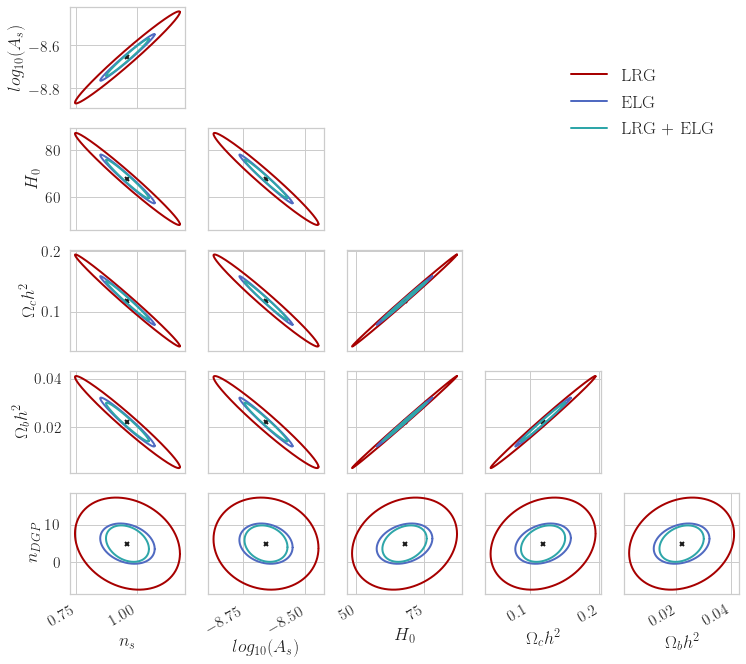

In [51]:
#Galaxy clustering alone
LRG_DGPn5_Xi024 = np.loadtxt('FisherLRG_DGPn5_xi024.txt', unpack = True)
ELG_DGPn5_Xi024 = np.loadtxt('FisherELG_DGPn5_xi024.txt', unpack = True)
LRGnELG_DGPn5_Xi024 = LRG_DGPn5_Xi024 + ELG_DGPn5_Xi024
#Define the Fisher matrix
lrg_DGPn5_xi024 = FisherMatrix(
        LRG_DGPn5_Xi024,
        ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         'n_{DGP}']
    )
elg_DGPn5_xi024 = FisherMatrix(
        ELG_DGPn5_Xi024,
        ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         'n_{DGP}']
    )
fisher = [lrg_DGPn5_xi024,
          elg_DGPn5_xi024,
          lrg_DGPn5_xi024 + elg_DGPn5_xi024,
]

#Start plotting
plotlabels = [r'LRG', \
              r'ELG',
              r'LRG + ELG']
paramsfish = ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'n_{DGP}']
corner_plot(fisher, plotlabels, \
            fid_dict = {'n_s':0.96, 'log_{10}(A_s)':np.log10(2.2e-9), 'H_0':67.77, '\Omega_c h^2':0.1194, \
                        '\Omega_b h^2':0.022, 'n_{DGP}': 5.0}, \
            colors = color_for_ellipses6, params = paramsfish, lw=2, labelsize=18, rotate_xlabels = True, gridline = True, loc='upper right', save_file=rootpath+'/DGPn5_LRG+ELG_Full.pdf')

/Users/RayneLiu/.local/lib/python3.6/site-packages/orphics/stats.py:245: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


Saved plot to /Users/RayneLiu/Desktop/Research/Cosmology/Results_Reports/Plots_for_paper/Fisher_Forecasts/DGPn5_LRG+ELG_Full.pdf


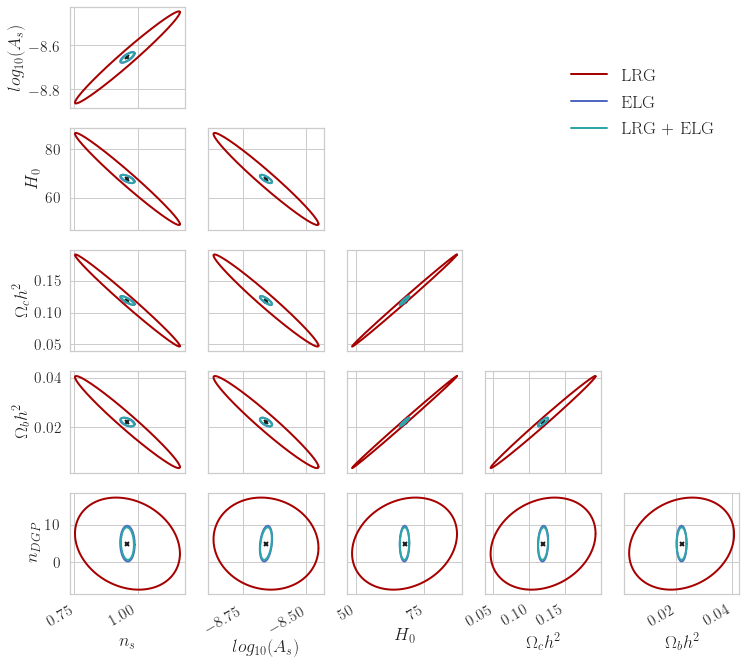

In [22]:
#OLD RESULTS
#Galaxy clustering alone
LRG_DGPn5_Xi024 = np.loadtxt('FisherLRG_DGPn5_xi024.txt', unpack = True)
ELG_DGPn5_Xi024 = np.loadtxt('FisherELG_DGPn5_xi024.txt', unpack = True)
LRGnELG_DGPn5_Xi024 = LRG_DGPn5_Xi024 + ELG_DGPn5_Xi024
#Define the Fisher matrix
lrg_DGPn5_xi024 = FisherMatrix(
        LRG_DGPn5_Xi024,
        ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         'n_{DGP}']
    )
elg_DGPn5_xi024 = FisherMatrix(
        ELG_DGPn5_Xi024,
        ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'b_1', '\sigma_{RSD}', \
         'n_{DGP}']
    )
fisher = [lrg_DGPn5_xi024,
          elg_DGPn5_xi024,
          lrg_DGPn5_xi024 + elg_DGPn5_xi024,
]

#Start plotting
plotlabels = [r'LRG', \
              r'ELG',
              r'LRG + ELG']
paramsfish = ['n_s', 'log_{10}(A_s)', 'H_0', '\Omega_c h^2', '\Omega_b h^2', 'n_{DGP}']
corner_plot(fisher, plotlabels, \
            fid_dict = {'n_s':0.96, 'log_{10}(A_s)':np.log10(2.2e-9), 'H_0':67.77, '\Omega_c h^2':0.1194, \
                        '\Omega_b h^2':0.022, 'n_{DGP}': 5.0}, \
            colors = color_for_ellipses6, params = paramsfish, lw=2, labelsize=18, rotate_xlabels = True, gridline = True, loc='upper right', save_file=rootpath+'/DGPn5_LRG+ELG_Full.pdf')

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


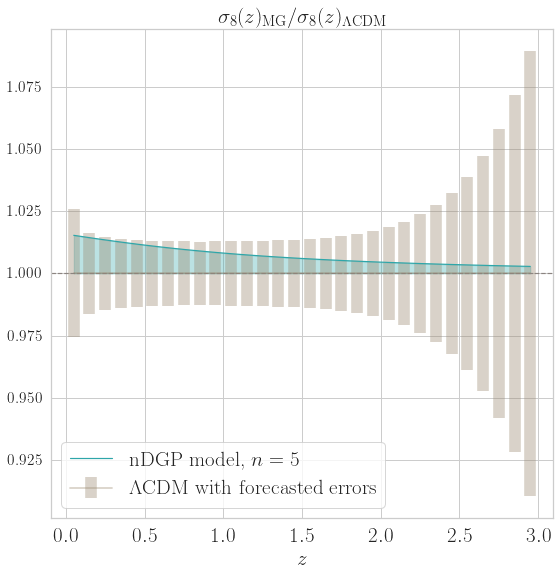

Testing partial derivative over n
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over n converges nicely
The chosen derivative array is:
[[-0.00291144]
 [-0.00273785]
 [-0.00257032

0

In [44]:
#Cluster abundances alone
var = (z, k)
pars = 5
labels = r'nDGP model, $n=5$'
Fishn5, Errn5 = Fisher_MG_final.modelanalysis(DGP, var, pars = pars, labels = labels)
os.system('afplay /System/Library/Sounds/Submarine.aiff')

In [52]:
#From galaxy clustering
CovDGPn5_LRG = np.linalg.inv(LRG_DGPn5_Xi024)
DGPn5_LRG = np.sqrt(CovDGPn5_LRG[-1][-1])
print('Error of n_DGP from LRG:')
print(DGPn5_LRG)

CovDGPn5_ELG = np.linalg.inv(ELG_DGPn5_Xi024)
DGPn5_ELG = np.sqrt(CovDGPn5_ELG[-1][-1])
print('Error of n_DGP from ELG:')
print(DGPn5_ELG)

CovDGPn5_gal = np.linalg.inv(LRGnELG_DGPn5_Xi024)
DGPn5_gal = np.sqrt(CovDGPn5_gal[-1][-1])
print('Error of n_DGP from galaxy clustering:')
print(DGPn5_gal)
DGPn5_gal = np.sqrt(CovDGPn5_gal[-1][-1])

#Combined with cluster abundances
FishDGPn5 = copy.deepcopy(LRGnELG_DGPn5_Xi024)
Covn5 = np.linalg.inv(Fishn5)
FishDGPn5[-1][-1] = copy.deepcopy(LRGnELG_DGPn5_Xi024[-1][-1]) + copy.deepcopy(Fishn5[-1][-1])

CovDGPn5_comb = np.linalg.inv(FishDGPn5)
DGPn5_comb = np.sqrt(CovDGPn5_comb[-1][-1])

print('Error of n_DGP from cluster abundances:')
print(Errn5)
print('Error of n_DGP combined:')
print(DGPn5_comb)

Error of n_DGP from LRG:
8.300557677690444
Error of n_DGP from ELG:
3.6312094462040694
Error of n_DGP from galaxy clustering:
3.285835109646386
Error of n_DGP from cluster abundances:
1.772264769142605
Error of n_DGP combined:
1.5598391987713955


In [37]:
#OLD RESULTS
#From galaxy clustering
CovDGPn5_LRG = np.linalg.inv(LRG_DGPn5_Xi024)
DGPn5_LRG = np.sqrt(CovDGPn5_LRG[-1][-1])
print('Error of n_DGP from LRG:')
print(DGPn5_LRG)

CovDGPn5_ELG = np.linalg.inv(ELG_DGPn5_Xi024)
DGPn5_ELG = np.sqrt(CovDGPn5_ELG[-1][-1])
print('Error of n_DGP from ELG:')
print(DGPn5_ELG)

CovDGPn5_gal = np.linalg.inv(LRGnELG_DGPn5_Xi024)
DGPn5_gal = np.sqrt(CovDGPn5_gal[-1][-1])
print('Error of n_DGP from galaxy clustering:')
print(DGPn5_gal)
DGPn5_gal = np.sqrt(CovDGPn5_gal[-1][-1])

#Combined with cluster abundances
FishDGPn5 = copy.deepcopy(LRGnELG_DGPn5_Xi024)
Covn5 = np.linalg.inv(Fishn5)
FishDGPn5[-1][-1] = copy.deepcopy(LRGnELG_DGPn5_Xi024[-1][-1]) + copy.deepcopy(Fishn5[-1][-1])

CovDGPn5_comb = np.linalg.inv(FishDGPn5)
DGPn5_comb = np.sqrt(CovDGPn5_comb[-1][-1])

print('Error of n_DGP from cluster abundances:')
print(Errn5)
print('Error of n_DGP combined:')
print(DGPn5_comb)

Error of n_DGP from LRG:
8.208666933445759
Error of n_DGP from ELG:
3.1793409850870087
Error of n_DGP from galaxy clustering:
2.904897048615719
Error of n_DGP from cluster abundances:
1.772264769142605
Error of n_DGP combined:
1.5129245582831956


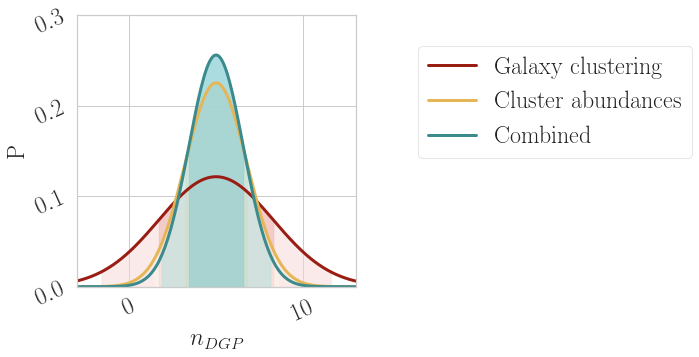

In [53]:
#Plot the combined scenario, only for n_DGP
n_fid = 5.
n_range = 8.
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
paramlabels = [r'$n_{DGP}$']
legnlabels = [r'Galaxy clustering', 'Cluster abundances', r'Combined']
labelfont = 24
lw = 3.

Cov_gauss = np.array([CovDGPn5_gal[-1:].T[-1:].T, np.linalg.inv(Fishn5), CovDGPn5_comb[-1:].T[-1:].T])
sigmasn = np.array([DGPn5_gal, Errn5, DGPn5_comb])
#alpha = 1.52
#print(sigmasn)

#Go over each subplot and plot the data - although I only have one grid, I still wanna keep the format
#So that I can use the features of axplot
#Set the plot range
axs.set_xlim(n_fid - n_range, n_fid + n_range)
axs.set_ylim(n_fid - n_range, n_fid + n_range)

#Plot the 1-param analyses
x = np.linspace(n_fid - 8.2, n_fid + 8.2, 200)
for l in range(len(sigmasn)):
    axs.plot(x, gauss(x, n_fid, sigmasn[l]), color = gaussbar[l][0], linewidth = lw, label = legnlabels[l])
    fills1 = np.linspace(n_fid - sigmasn[l], n_fid + sigmasn[l], 50)
    fills2 = np.linspace(n_fid - 2 * sigmasn[l], n_fid + 2 * sigmasn[l], 50)
    axs.fill_between(fills2, gauss(fills2, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][2], alpha = 0.5)
    axs.fill_between(fills1, gauss(fills1, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][1], alpha = 0.5)
    axs.set_ylim(ymin=0, ymax = 0.3)
axs.set_xlabel('$n_{DGP}$', fontsize = labelfont)
axs.set_ylabel('P', fontsize = labelfont)

axs.tick_params(labelsize = labelfont, labelrotation=24)
#axs.yaxis.tick_right()

#Add description
axs.legend(loc='center right',bbox_to_anchor=(2.25,0.68), fontsize = labelfont, fancybox=True, framealpha=0.5)

fig.savefig(rootpath + '/Remix_gaussian_n5.pdf', format='pdf', bbox_inches='tight', dpi=1200)

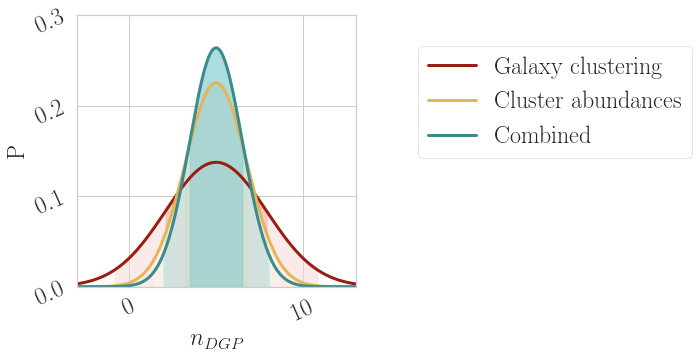

In [38]:
#OLD RESULTS
#Plot the combined scenario, only for n_DGP
n_fid = 5.
n_range = 8.
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
paramlabels = [r'$n_{DGP}$']
legnlabels = [r'Galaxy clustering', 'Cluster abundances', r'Combined']
labelfont = 24
lw = 3.

Cov_gauss = np.array([CovDGPn5_gal[-1:].T[-1:].T, np.linalg.inv(Fishn5), CovDGPn5_comb[-1:].T[-1:].T])
sigmasn = np.array([DGPn5_gal, Errn5, DGPn5_comb])
#alpha = 1.52
#print(sigmasn)

#Go over each subplot and plot the data - although I only have one grid, I still wanna keep the format
#So that I can use the features of axplot
#Set the plot range
axs.set_xlim(n_fid - n_range, n_fid + n_range)
axs.set_ylim(n_fid - n_range, n_fid + n_range)

#Plot the 1-param analyses
x = np.linspace(n_fid - 8.2, n_fid + 8.2, 200)
for l in range(len(sigmasn)):
    axs.plot(x, gauss(x, n_fid, sigmasn[l]), color = gaussbar[l][0], linewidth = lw, label = legnlabels[l])
    fills1 = np.linspace(n_fid - sigmasn[l], n_fid + sigmasn[l], 50)
    fills2 = np.linspace(n_fid - 2 * sigmasn[l], n_fid + 2 * sigmasn[l], 50)
    axs.fill_between(fills2, gauss(fills2, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][2], alpha = 0.5)
    axs.fill_between(fills1, gauss(fills1, n_fid, sigmasn[l]) , y2 = 0, color = gaussbar[l][1], alpha = 0.5)
    axs.set_ylim(ymin=0, ymax = 0.3)
axs.set_xlabel('$n_{DGP}$', fontsize = labelfont)
axs.set_ylabel('P', fontsize = labelfont)

axs.tick_params(labelsize = labelfont, labelrotation=24)
#axs.yaxis.tick_right()

#Add description
axs.legend(loc='center right',bbox_to_anchor=(2.25,0.68), fontsize = labelfont, fancybox=True, framealpha=0.5)

fig.savefig(rootpath + '/Remix_gaussian_n5.pdf', format='pdf', bbox_inches='tight', dpi=1200)